### 2(a) Perform the brightness enhancement of a specific range of gray levels and observe its result

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Original image shape: (512, 512)


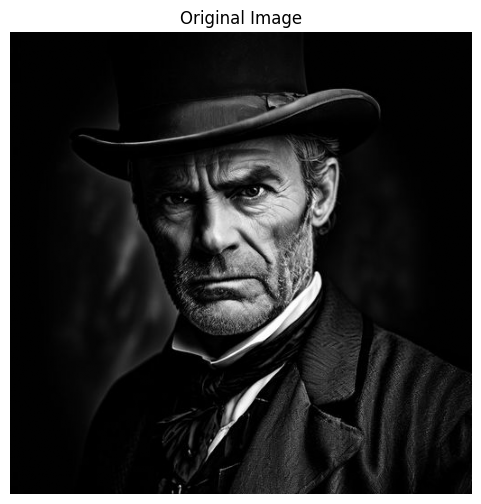

In [2]:
image_path = './man.jpeg' 

image = Image.open(image_path).convert('L')  
image = np.array(image)

if image.shape != (512, 512):
    image = np.array(Image.fromarray(image).resize((512, 512), Image.Resampling.LANCZOS))

print(f"Original image shape: {image.shape}")

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

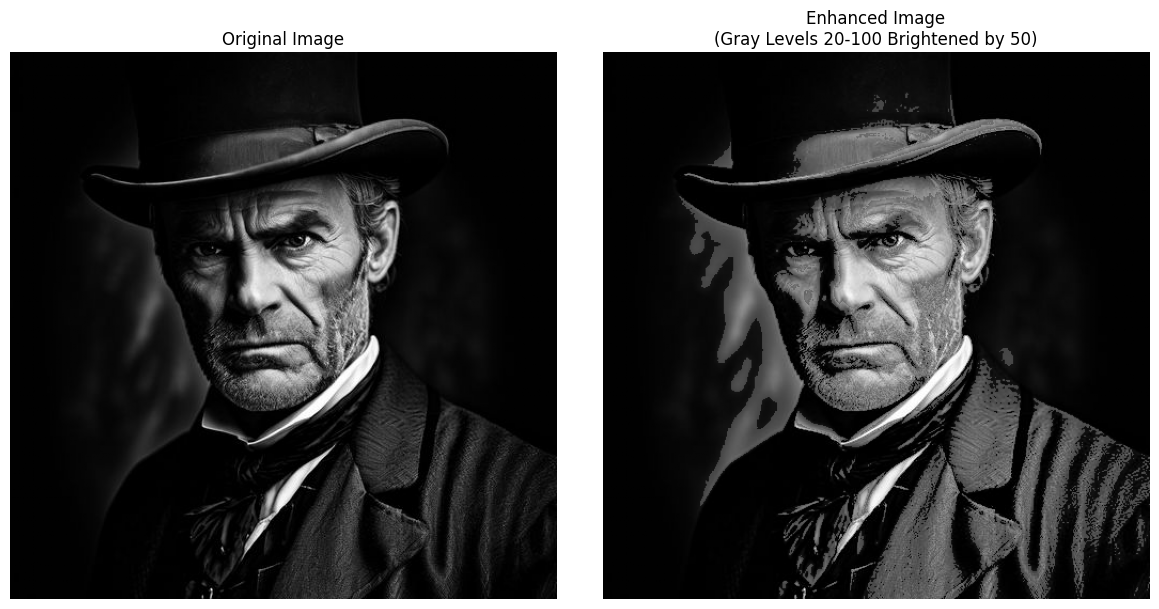

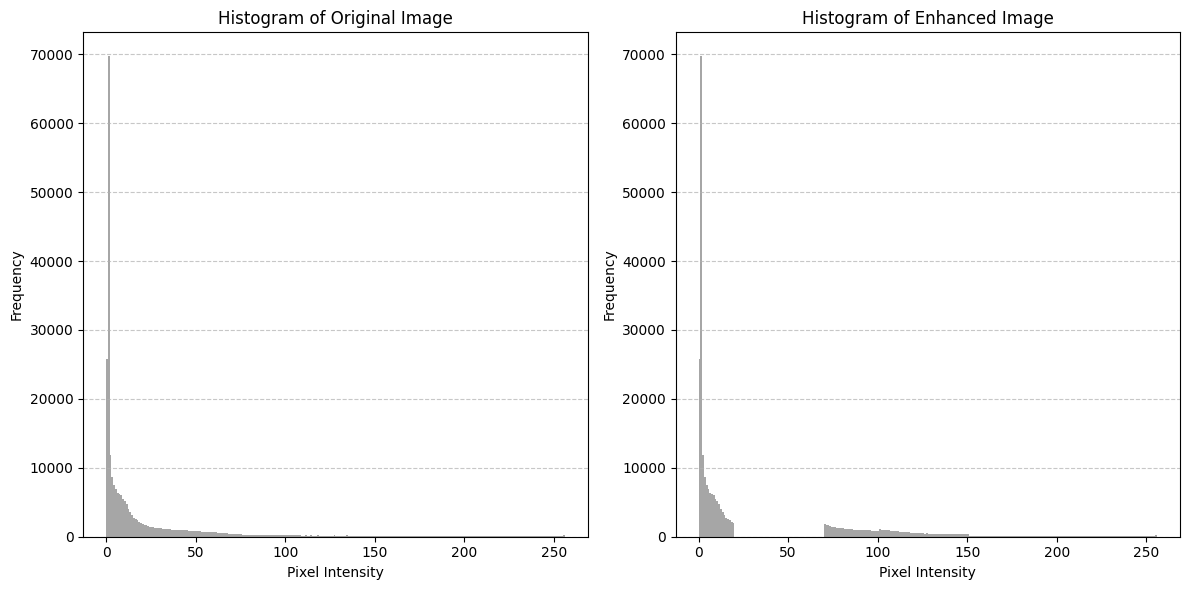

In [3]:
def enhance_brightness(image, lower_bound, upper_bound, enhancement_value):
    height, width = image.shape
    enhanced_image = image.copy()
    for i in range(height):
        for j in range(width):
            if lower_bound <= image[i, j] <= upper_bound:
                new_value = image[i, j] + enhancement_value
                enhanced_image[i, j] = min(max(new_value, 0), 255)
            else:
                enhanced_image[i, j] = image[i, j]
    return enhanced_image
    
lower_bound = 20  
upper_bound = 100  
enhancement_value = 50  

enhanced_image = enhance_brightness(image, lower_bound, upper_bound, enhancement_value)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title(f"Enhanced Image\n(Gray Levels {lower_bound}-{upper_bound} Brightened by {enhancement_value})")
plt.axis('off')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

# Original image histogram
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Enhanced image histogram
plt.subplot(1, 2, 2)
plt.hist(enhanced_image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title("Histogram of Enhanced Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 2(b) Differentiate the results of power law transform and inverse logarithmic transform

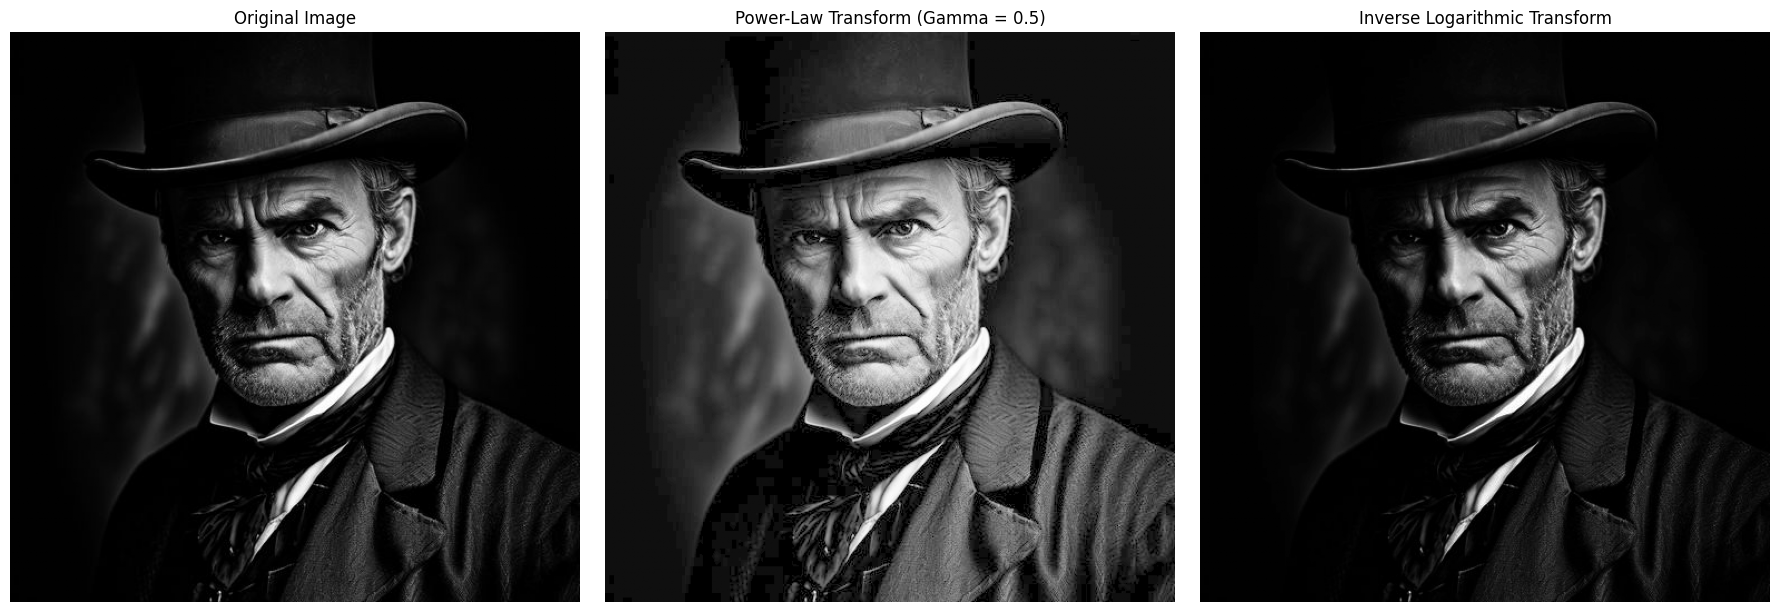

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


image_path = './man.jpeg' 
image = Image.open(image_path).convert('L')
image = np.array(image)

normalized_image = image / 255.0

def power_law_transform(image, gamma, c=1.0):
    return c * np.power(image, gamma)


def inverse_log_transform(image, c=2.0):
    return c * np.exp(image)

gamma = 0.5
c_power = 1.0  
c_inverse = 1.0 

power_law_image = power_law_transform(normalized_image, gamma, c_power)
inverse_log_image = inverse_log_transform(normalized_image, c_inverse)

power_law_image = (power_law_image / power_law_image.max() * 255).astype(np.uint8)
inverse_log_image = (inverse_log_image / inverse_log_image.max() * 255).astype(np.uint8)


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(power_law_image, cmap='gray')
plt.title(f"Power-Law Transform (Gamma = {gamma})")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(inverse_log_image, cmap='gray')
plt.title("Inverse Logarithmic Transform")
plt.axis('off')

plt.tight_layout()
plt.show()


### 2(c) Find the difference image between original and the image obtained by last three bits (MSB) [explanation: original image plus another 8 image of each 8 bit. then we add this 8 image sequencially to with each other to get the representation]

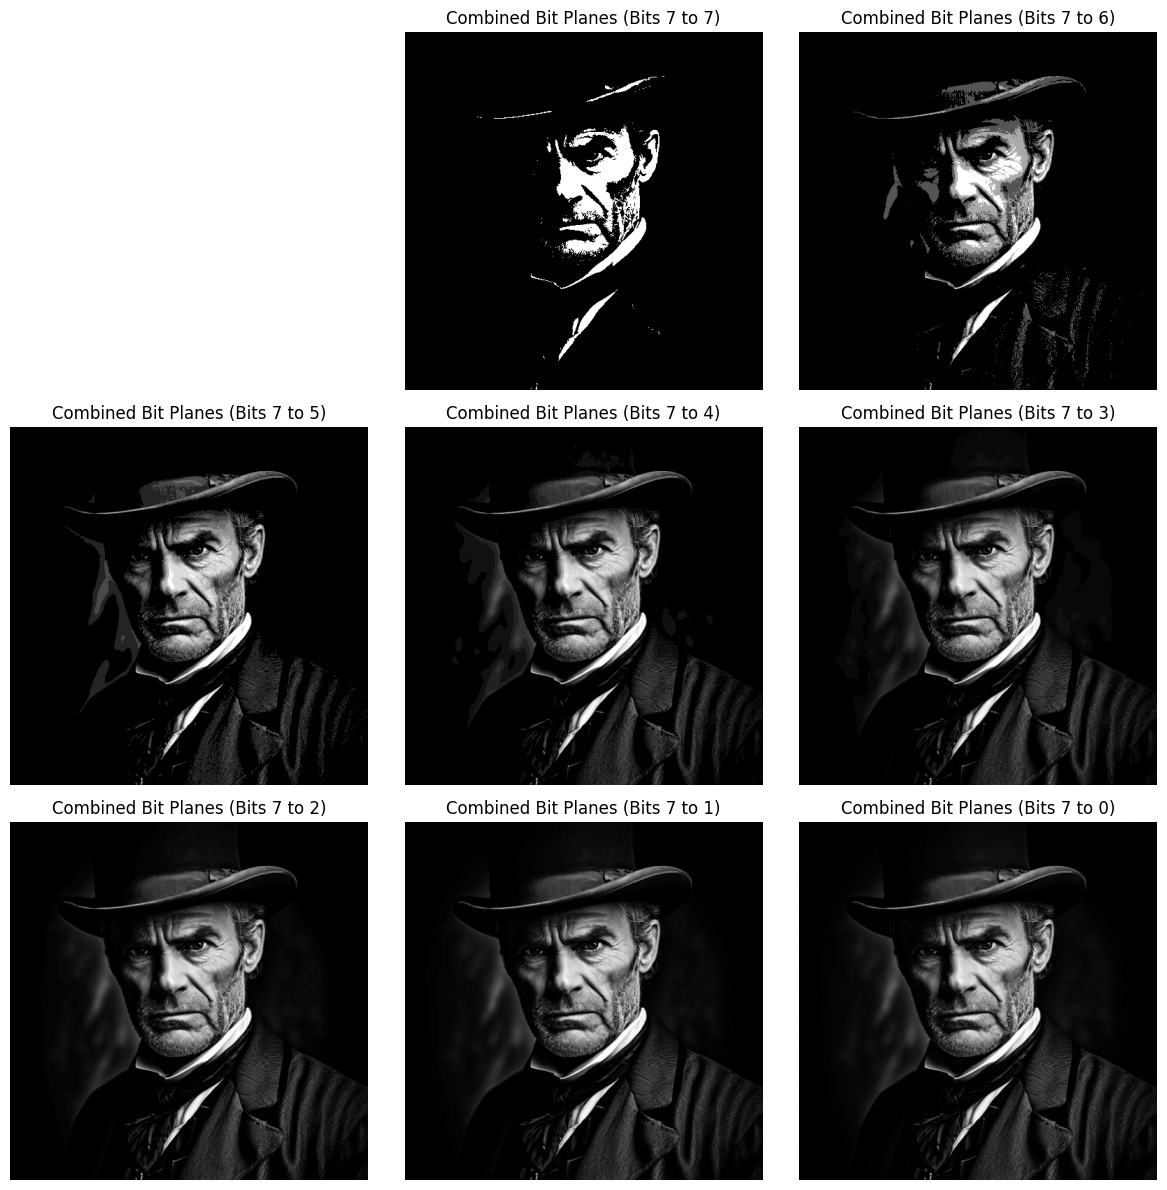

In [13]:
#Bit extract and ploting each bit
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = './man.jpeg' 
image = Image.open(image_path).convert('L')
image = np.array(image)

if image.shape != (512, 512):
    image = np.array(Image.fromarray(image).resize((512, 512), Image.Resampling.LANCZOS))

def extract_bit_plane(image, bit):
    return ((image >> bit) & 1) * (2 ** bit) 

combined_image = np.zeros_like(image, dtype=np.uint8) 
plt.figure(figsize=(12, 12))

for bit in range(7, -1, -1):  
    bit_plane = extract_bit_plane(image, bit)
    combined_image += bit_plane
    
    plt.subplot(3, 3, 8 - bit + 1)
    plt.imshow(combined_image, cmap='gray')
    plt.title(f"Combined Bit Planes (Bits 7 to {bit})")
    plt.axis('off')

plt.tight_layout()
plt.show()


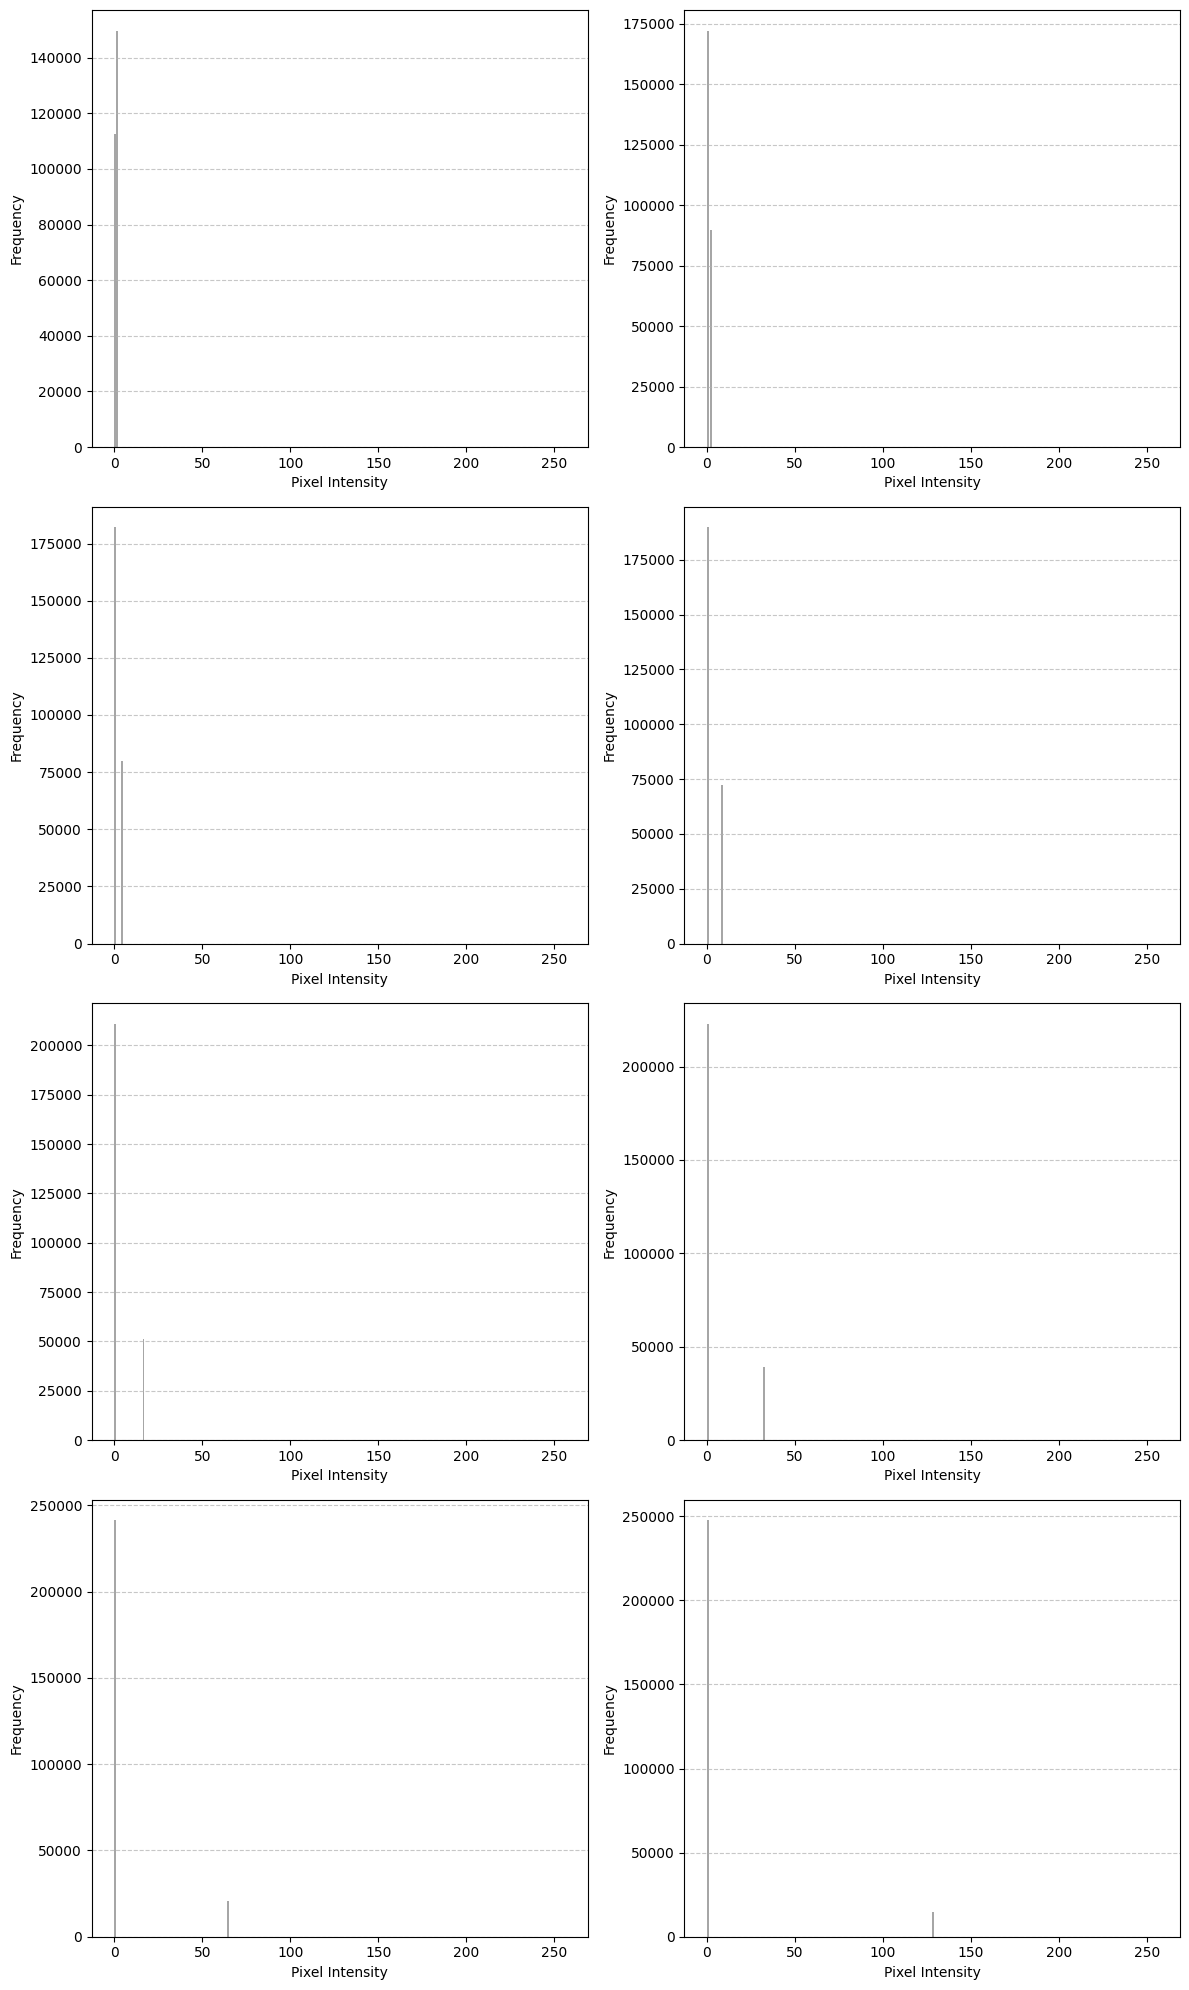

In [11]:
#To show why the image shows black and white
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = './man.jpeg' 
image = Image.open(image_path).convert('L')
image = np.array(image)

if image.shape != (512, 512):
    image = np.array(Image.fromarray(image).resize((512, 512), Image.Resampling.LANCZOS))

def extract_bit_plane(image, bit):
    return ((image >> bit) & 1) * (1<<bit)

plt.figure(figsize=(12, 20))
for bit in range(8):
    bit_plane = extract_bit_plane(image, bit)
    plt.subplot(4, 2, bit + 1)
    plt.hist(bit_plane.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


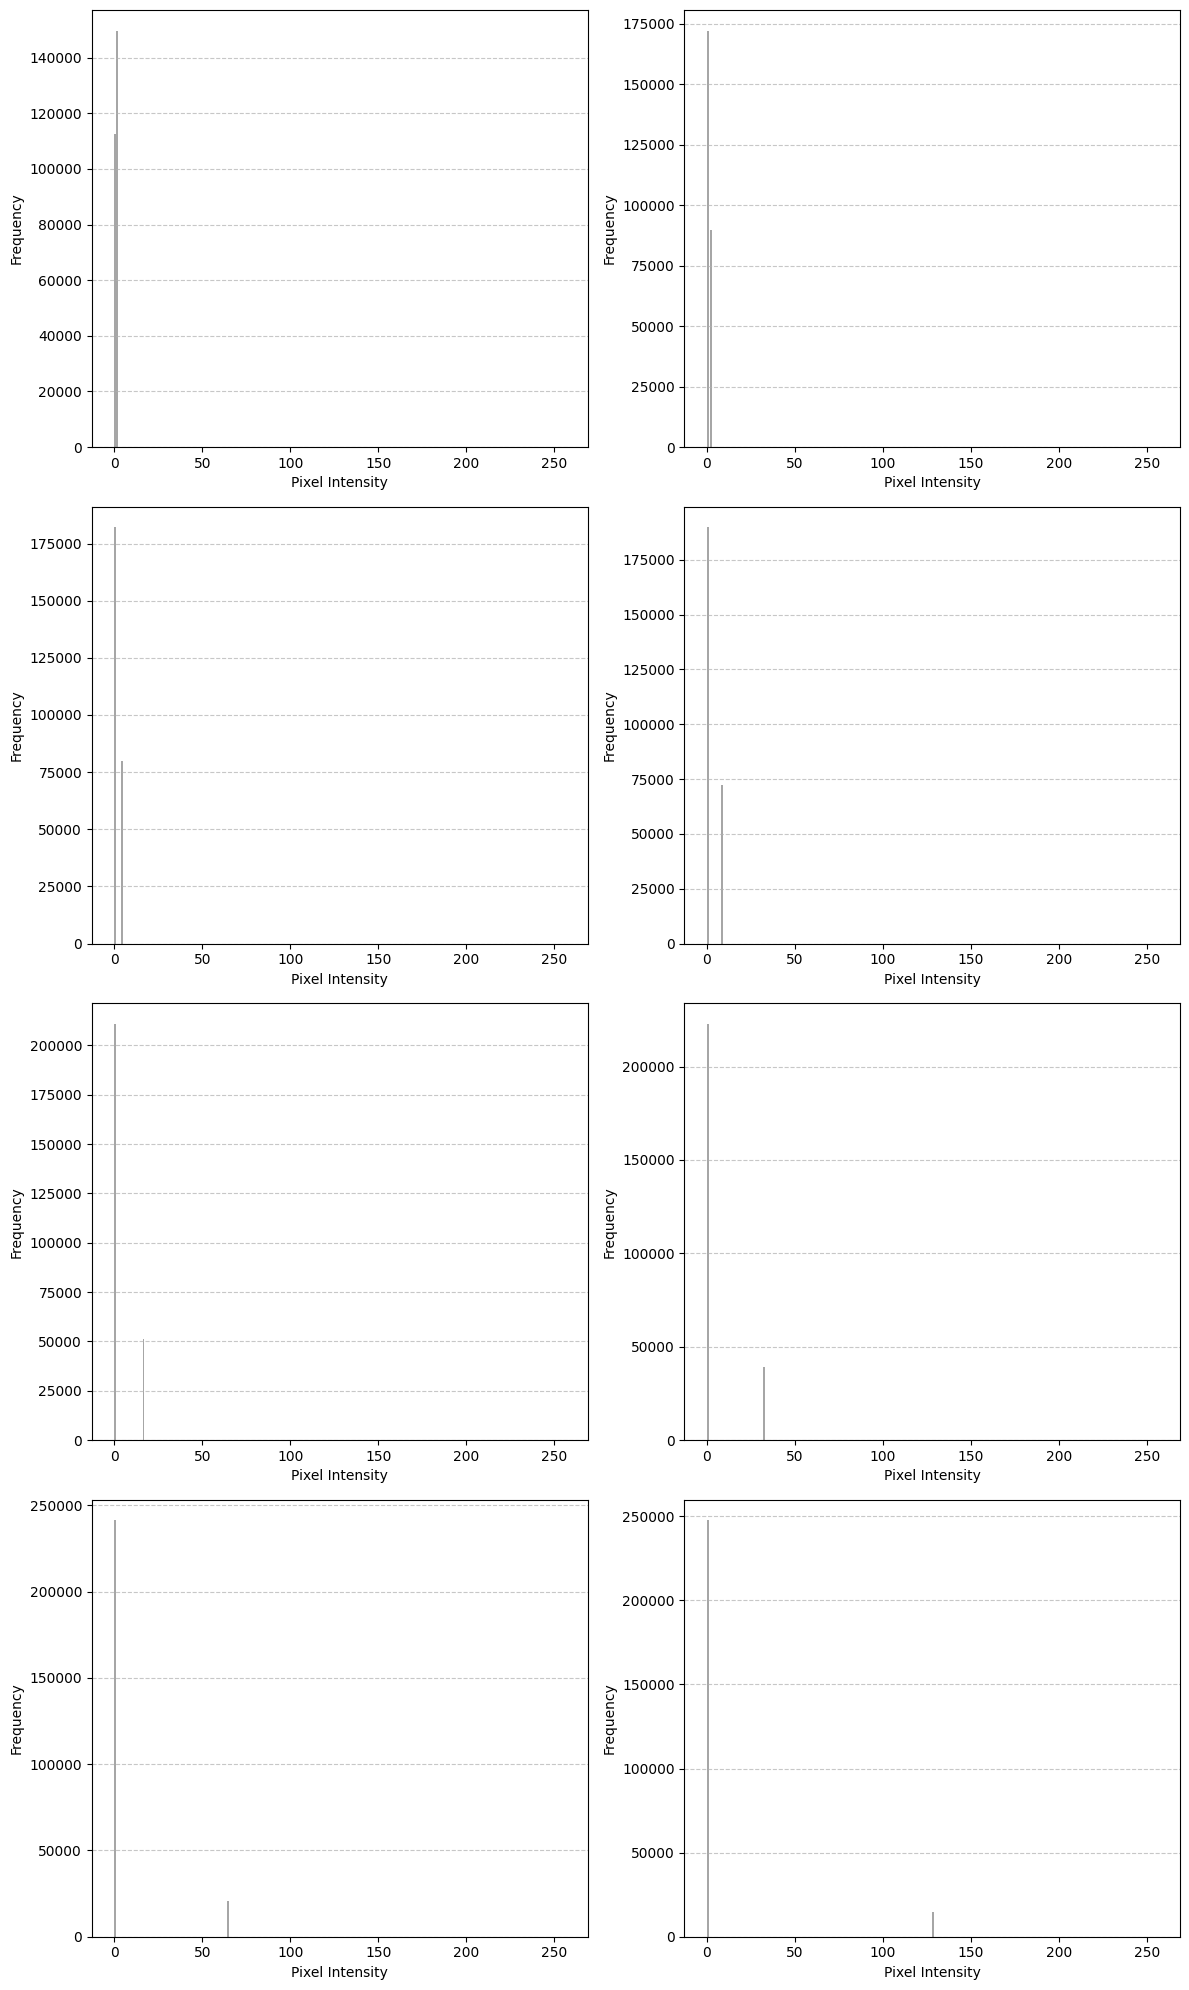

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = './man.jpeg' 
image = Image.open(image_path).convert('L')
image = np.array(image)

if image.shape != (512, 512):
    image = np.array(Image.fromarray(image).resize((512, 512), Image.Resampling.LANCZOS))

def extract_bit_plane(image, bit):
    # Bitwise AND operation to isolate the bit, then normalize to [0, 255]
    return ((image >> bit) & 1) * (1<<bit)

# plt.figure(figsize=(12, 10))
# for bit in range(8): 
#     bit_plane = extract_bit_plane(image, bit)
    
#     # Plot each bit plane
#     plt.subplot(2, 4, bit + 1)
#     plt.imshow(bit_plane, cmap='gray')
#     plt.title(f"Bit Plane {bit} ({'MSB' if bit == 7 else 'LSB' if bit == 0 else ''})")
#     plt.axis('off')
# plt.show()


plt.figure(figsize=(12, 20))
for bit in range(8):
    bit_plane = extract_bit_plane(image, bit)
    plt.subplot(4, 2, bit + 1)
    plt.hist(bit_plane.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


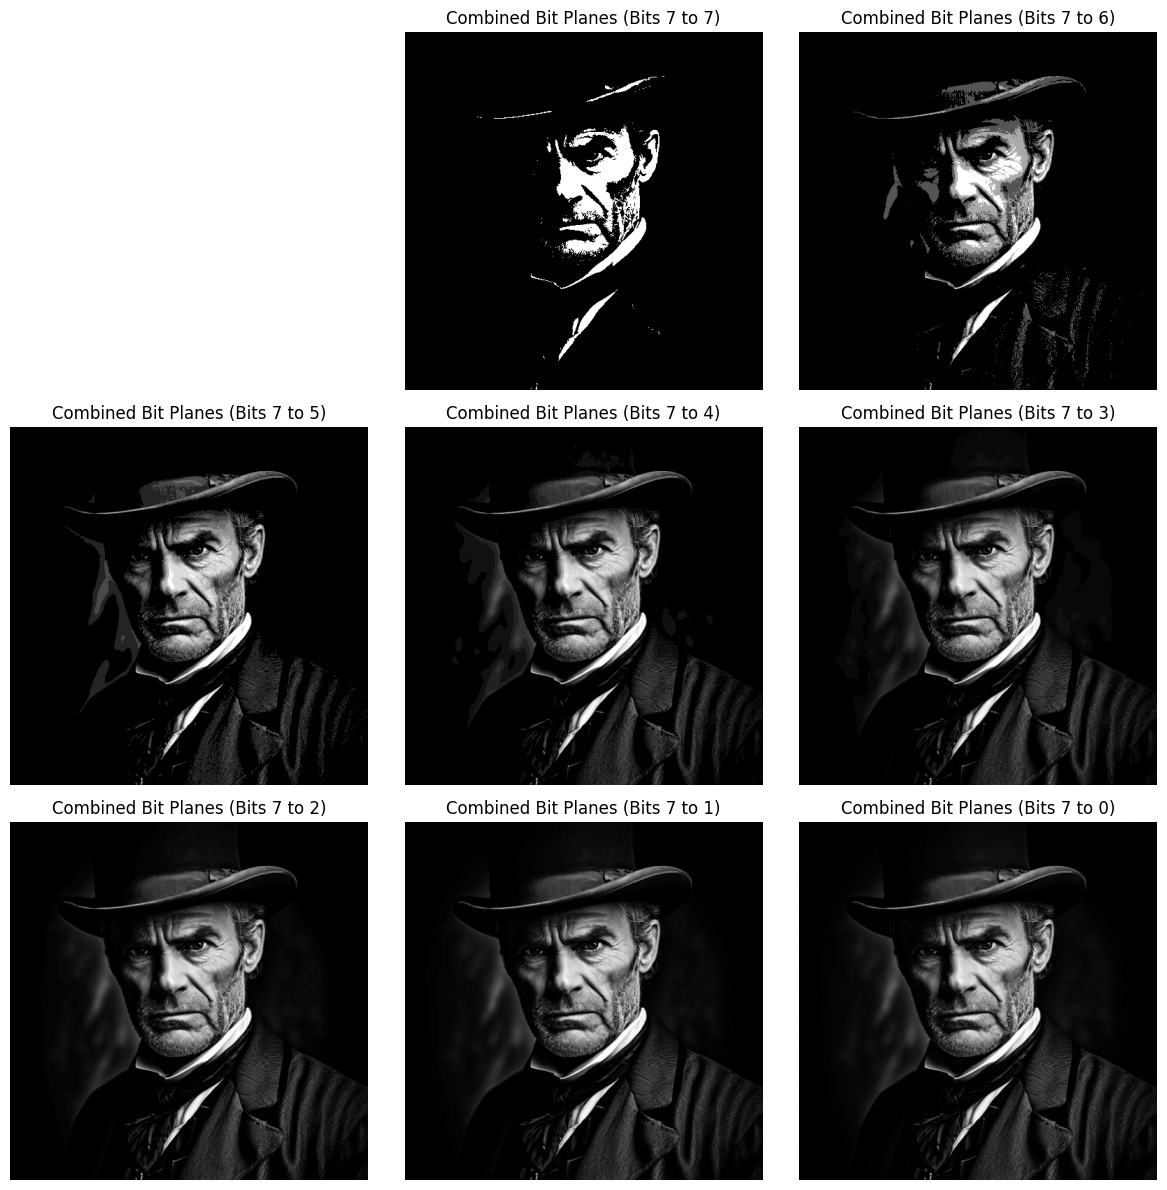

In [14]:
#MSB to LSB
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = './man.jpeg'
image = Image.open(image_path).convert('L')
image = np.array(image)

if image.shape != (512, 512):
    image = np.array(Image.fromarray(image).resize((512, 512), Image.Resampling.LANCZOS))


def extract_bit_plane(image, bit):
    return ((image >> bit) & 1) * (2 ** bit) 

combined_image = np.zeros_like(image, dtype=np.uint8)  
plt.figure(figsize=(12, 12))

for bit in range(7, -1, -1): 
    bit_plane = extract_bit_plane(image, bit)
    combined_image += bit_plane  
    

    plt.subplot(3, 3, 8 - bit + 1)  
    plt.imshow(combined_image, cmap='gray')
    plt.title(f"Combined Bit Planes (Bits 7 to {bit})")
    plt.axis('off')

plt.tight_layout()
plt.show()


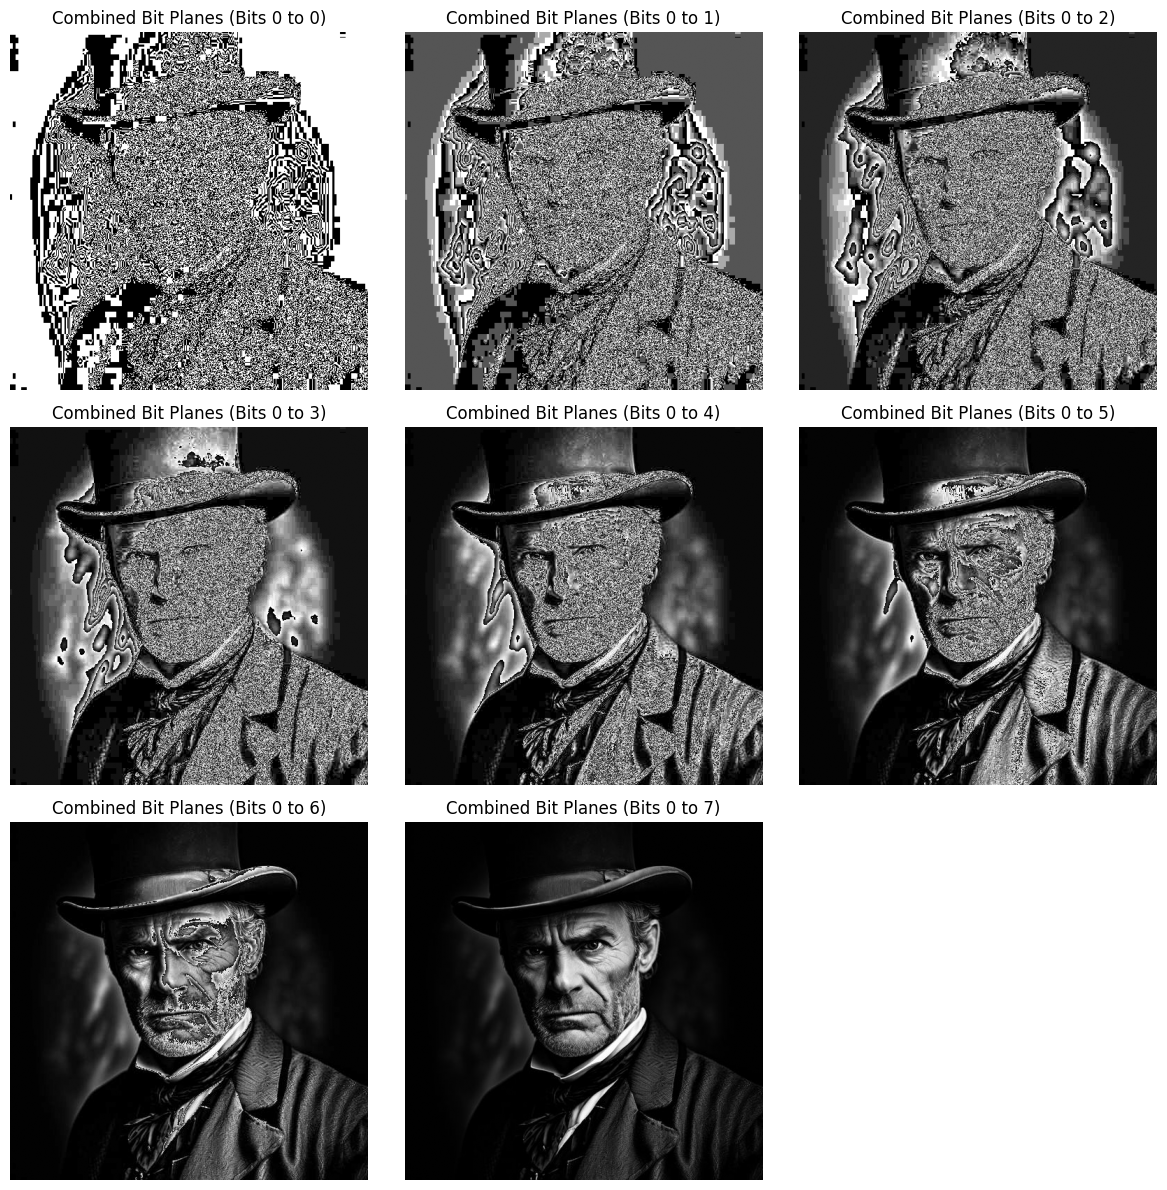

In [15]:
#LSB TO MSB
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = './man.jpeg'
image = Image.open(image_path).convert('L')
image = np.array(image)

if image.shape != (512, 512):
    image = np.array(Image.fromarray(image).resize((512, 512), Image.Resampling.LANCZOS))


def extract_bit_plane(image, bit):
    return ((image >> bit) & 1) * (2 ** bit) 

combined_image = np.zeros_like(image, dtype=np.uint8)  
plt.figure(figsize=(12, 12))

for bit in range(0, 8): 
    bit_plane = extract_bit_plane(image, bit)
    combined_image += bit_plane  
    
    plt.subplot(3, 3, bit + 1)  
    plt.imshow(combined_image, cmap='gray')
    plt.title(f"Combined Bit Planes (Bits 0 to {bit})")
    plt.axis('off')

plt.tight_layout()
plt.show()
